In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

%matplotlib inline
# plt.show로 불러오지않아도 알아서 나오는거

In [4]:
raw_data = pd.read_csv("../01.files/01.Bigdata_basic/FITNESS_정제.csv", encoding = 'euc-kr')
raw_data.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.15,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,NaN,38,30대,81.87,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.84,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.87,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,NaN,49.156,8.95 SEC,180,44,185,1977-02-09


In [5]:
raw_data.isnull().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False


In [6]:
raw_data.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
BIRTH       0
dtype: int64

In [7]:
raw_data['GENDER'].fillna("여성", inplace =True)
raw_data.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.15,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,여성,38,30대,81.87,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.84,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.87,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,NaN,49.156,8.95 SEC,180,44,185,1977-02-09


In [8]:
raw_data.groupby("GENDER")['WEIGHT'].agg('mean')

GENDER
남성    82.426923
여성    72.908750
Name: WEIGHT, dtype: float64

In [9]:
raw_data['WEIGHT'] = raw_data['WEIGHT'].fillna(raw_data.groupby("GENDER")['WEIGHT'].transform('mean')).round(3)
raw_data.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.150,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,여성,38,30대,81.870,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.840,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.870,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,82.427,49.156,8.95 SEC,180,44,185,1977-02-09


In [10]:
raw_data[['RUNTIME', 'RUNTIMEUNIT']] = raw_data['RUNTIME'].str.split(' ',expand=True)
raw_data['RUNTIME'] = raw_data['RUNTIME'].astype('float64')
raw_data

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIMEUNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180,1988-12-10,SEC
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188,1977-06-11,SEC
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166,1969-05-12,SEC
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155,1964-11-13,SEC
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168,1966-04-14,SEC


<Axes: >

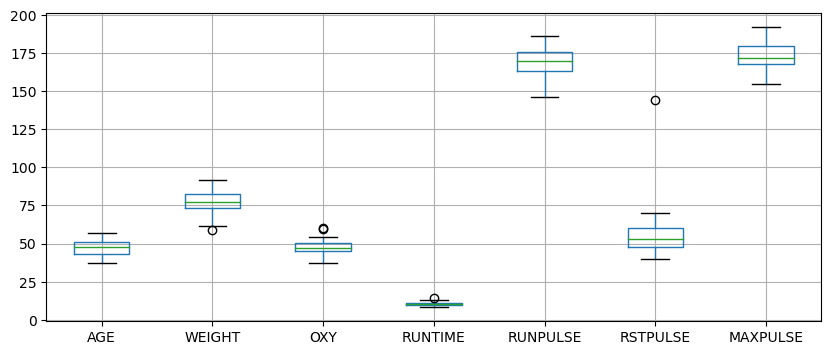

In [11]:
raw_data.boxplot(figsize=(10,4))

In [13]:
raw_data['RSTPULSE'] >= 100
raw_data.loc[27:29]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIMEUNIT
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176,1968-05-02,SEC
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172,1969-11-03,SEC
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176,1976-12-04,SEC


In [14]:
df_fitness = raw_data[raw_data['RSTPULSE'] < 100]
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIMEUNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180,1988-12-10,SEC
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188,1977-06-11,SEC
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166,1969-05-12,SEC
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155,1964-11-13,SEC
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168,1966-04-14,SEC


In [15]:
df_fitness.reset_index(drop = True, inplace = True)
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIMEUNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180,1988-12-10,SEC
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188,1977-06-11,SEC
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166,1969-05-12,SEC
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155,1964-11-13,SEC
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168,1966-04-14,SEC


In [16]:
df_fitness['BIRTH'] = pd.to_datetime(df_fitness['BIRTH'], format = '%Y-%m-%d')
df_fitness['YEAR'] = df_fitness['BIRTH'].dt.year
df_fitness['MONTH'] = df_fitness['BIRTH'].dt.month
df_fitness['DAY'] = df_fitness['BIRTH'].dt.day
df_fitness['WEEKDAY'] = df_fitness['BIRTH'].dt.weekday
df_fitness.head()

/var/folders/hf/f987bl1j4tz9tt0z606pjnfr0000gn/T/ipykernel_79656/1447956333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitness['BIRTH'] = pd.to_datetime(df_fitness['BIRTH'], format = '%Y-%m-%d')
/var/folders/hf/f987bl1j4tz9tt0z606pjnfr0000gn/T/ipykernel_79656/1447956333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitness['YEAR'] = df_fitness['BIRTH'].dt.year
/var/folders/hf/f987bl1j4tz9tt0z606pjnfr0000gn/T/ipykernel_79656/1447956333.py:3: SettingWithCopyWarning: 
A value is trying to 

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIMEUNIT,YEAR,MONTH,DAY,WEEKDAY
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC,1976,4,5,0
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC,1986,9,6,5
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC,1978,4,7,4
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC,1966,8,8,0
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC,1977,2,9,2


In [18]:
df_fitness = df_fitness.drop(['NAME','BIRTH','RUNTIMEUNIT'], axis = 1)
df_fitness.head()

,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY
0,여성,42,40대,68.150,59.571,8.17,166,40,172,1976,4,5,0
1,여성,38,30대,81.870,60.055,8.63,170,48,186,1986,9,6,5
2,여성,43,40대,85.840,54.297,8.65,156,45,168,1978,4,7,4
3,여성,50,50대,70.870,54.625,8.92,146,48,155,1966,8,8,0
4,남성,49,40대,82.427,49.156,8.95,180,44,185,1977,2,9,2


In [20]:
df_fitness_dummy = pd.get_dummies(df_fitness, drop_first=True)
df_fitness_dummy.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,42,68.150,59.571,8.17,166,40,172,1976,4,5,0,1,1,0
1,38,81.870,60.055,8.63,170,48,186,1986,9,6,5,1,0,0
2,43,85.840,54.297,8.65,156,45,168,1978,4,7,4,1,1,0
3,50,70.870,54.625,8.92,146,48,155,1966,8,8,0,1,0,1
4,49,82.427,49.156,8.95,180,44,185,1977,2,9,2,0,1,0


In [21]:
df_scale_std = StandardScaler()
df_scale_std = df_scale_std.fit_transform(df_fitness_dummy)

df_scale_std

array([[-0.80598457, -1.1193663 ,  2.33471715, -1.77182581, -0.36106583,
        -1.85665332, -0.20018538, -0.00820638, -0.81466283, -1.23353774,
        -1.41568389,  0.93541435,  1.06904497, -0.70710678],
       [-1.50684073,  0.60742153,  2.42949407, -1.42346855,  0.02927561,
        -0.77772645,  1.32850299,  1.22274998,  0.60626071, -1.11679915,
         1.0825818 ,  0.93541435, -0.93541435, -0.70710678],
       [-0.63077054,  1.10708244,  1.30196204, -1.40832258, -1.33691944,
        -1.18232402, -0.63695349,  0.2379849 , -0.81466283, -1.00006057,
         0.58292866,  0.93541435,  1.06904497, -0.70710678],
       [ 0.59572773, -0.77702935,  1.36619102, -1.20385201, -2.31277304,
        -0.77772645, -2.05644983, -1.23916273,  0.322076  , -0.88332198,
        -1.41568389,  0.93541435, -0.93541435,  1.41421356],
       [ 0.42051369,  0.67752509,  0.29525099, -1.18113306,  1.00512921,
        -1.31718988,  1.21931096,  0.11488926, -1.38303224, -0.76658339,
        -0.41637762, -1.06

In [22]:
df_scale_std = pd.DataFrame(df_scale_std, columns=df_fitness_dummy.columns)
df_scale_std.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,-0.805985,-1.119366,2.334717,-1.771826,-0.361066,-1.856653,-0.200185,-0.008206,-0.814663,-1.233538,-1.415684,0.935414,1.069045,-0.707107
1,-1.506841,0.607422,2.429494,-1.423469,0.029276,-0.777726,1.328503,1.222750,0.606261,-1.116799,1.082582,0.935414,-0.935414,-0.707107
2,-0.630771,1.107082,1.301962,-1.408323,-1.336919,-1.182324,-0.636953,0.237985,-0.814663,-1.000061,0.582929,0.935414,1.069045,-0.707107
3,0.595728,-0.777029,1.366191,-1.203852,-2.312773,-0.777726,-2.056450,-1.239163,0.322076,-0.883322,-1.415684,0.935414,-0.935414,1.414214
4,0.420514,0.677525,0.295251,-1.181133,1.005129,-1.317190,1.219311,0.114889,-1.383032,-0.766583,-0.416378,-1.069045,1.069045,-0.707107


In [23]:
df_scale_desc = df_scale_std.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056,-1.608,-1.667,-1.700,-1.416,-1.069,-0.935,-0.707
25%,-0.631,-0.494,-0.486,-0.609,-0.703,-0.778,-0.637,-0.808,-0.815,-0.854,-0.916,-1.069,-0.935,-0.707
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200,-0.008,-0.388,-0.008,-0.416,0.935,-0.935,-0.707
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673,0.361,1.033,0.839,1.083,0.935,1.069,1.414
max,1.822,1.836,2.429,2.666,1.591,2.189,1.984,1.838,1.459,1.685,1.582,0.935,1.069,1.414


In [24]:
df_scale_minmax = MinMaxScaler().fit_transform(df_fitness_dummy)
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns=df_fitness_dummy.columns)
df_scale_minmax.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459,0.464286,0.272727,0.137931,0.000000,1.0,1.0,0.0
1,0.05,0.700154,1.000000,0.078498,0.60,0.266667,0.837838,0.821429,0.727273,0.172414,0.833333,1.0,0.0,0.0
2,0.30,0.822120,0.745974,0.081911,0.25,0.166667,0.351351,0.535714,0.272727,0.206897,0.666667,1.0,1.0,0.0
3,0.65,0.362212,0.760445,0.127986,0.00,0.266667,0.000000,0.107143,0.636364,0.241379,0.000000,1.0,0.0,1.0
4,0.60,0.717266,0.519169,0.133106,0.85,0.133333,0.810811,0.500000,0.090909,0.275862,0.333333,0.0,1.0,0.0


In [25]:
df_scale_robust = RobustScaler().fit_transform(df_fitness_dummy)
df_scale_robust = pd.DataFrame(df_scale_robust, columns=df_fitness_dummy.columns)
df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,-0.6875,-0.938037,2.463797,-1.535284,-0.296296,-1.162791,0.000000,0.000000,-0.230769,-0.724138,-0.50,0.0,1.0,0.0
1,-1.1875,0.535331,2.558834,-1.218589,0.000000,-0.418605,1.166667,1.052632,0.538462,-0.655172,0.75,0.0,0.0,0.0
2,-0.5625,0.961662,1.428207,-1.204819,-1.037037,-0.697674,-0.333333,0.210526,-0.230769,-0.586207,0.50,0.0,1.0,0.0
3,0.3125,-0.645941,1.492612,-1.018933,-1.777778,-0.418605,-1.416667,-1.052632,0.384615,-0.517241,-0.50,0.0,0.0,1.0
4,0.1875,0.595146,0.418733,-0.998279,0.740741,-0.790698,1.083333,0.105263,-0.538462,-0.448276,0.00,-1.0,1.0,0.0


In [26]:
# 140 Page
df_rstpulse = pd.DataFrame()
df_rstpulse["Raw"] = df_fitness_dummy["RSTPULSE"]  
df_rstpulse["Standard"] = df_scale_std["RSTPULSE"]
df_rstpulse["MinMax"] = df_scale_minmax["RSTPULSE"]
df_rstpulse["Robust"] = df_scale_robust["RSTPULSE"]
df_rstpulse.head().round(3)

,Raw,Standard,MinMax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


In [27]:
df_rstpulse.describe().round(3)

,Raw,Standard,MinMax,Robust
count,30.000,30.000,30.000,30.000
mean,53.767,0.000,0.459,0.118
std,7.542,1.017,0.251,0.702
min,40.000,-1.857,0.000,-1.163
25%,48.000,-0.778,0.267,-0.419
50%,52.500,-0.171,0.417,0.000
75%,58.750,0.672,0.625,0.581
max,70.000,2.189,1.000,1.628


array([[<Axes: title={'center': 'Raw'}>,
        <Axes: title={'center': 'Standard'}>],
       [<Axes: title={'center': 'MinMax'}>,
        <Axes: title={'center': 'Robust'}>]], dtype=object)

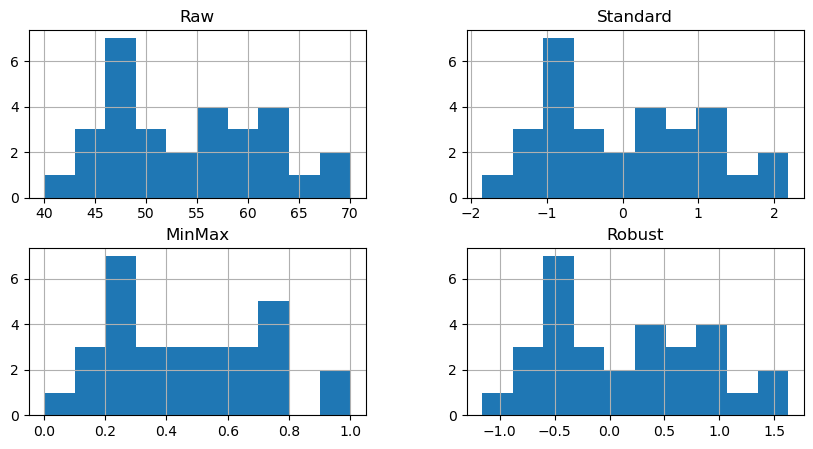

In [29]:
df_rstpulse[["Raw","Standard","MinMax", "Robust"]].hist(figsize = (10,5))

In [ ]:
R